# Chapter 3 - Fine-Tuning Your Model

## Classification metrics

Accuracy: fraction of correctly classified samples

But not good for imbalanced classes (could just always predict majority class and couldn't identify e.g. fraudulent transactions)

Need to use confusion matrix (TN, FP, FN, TP)

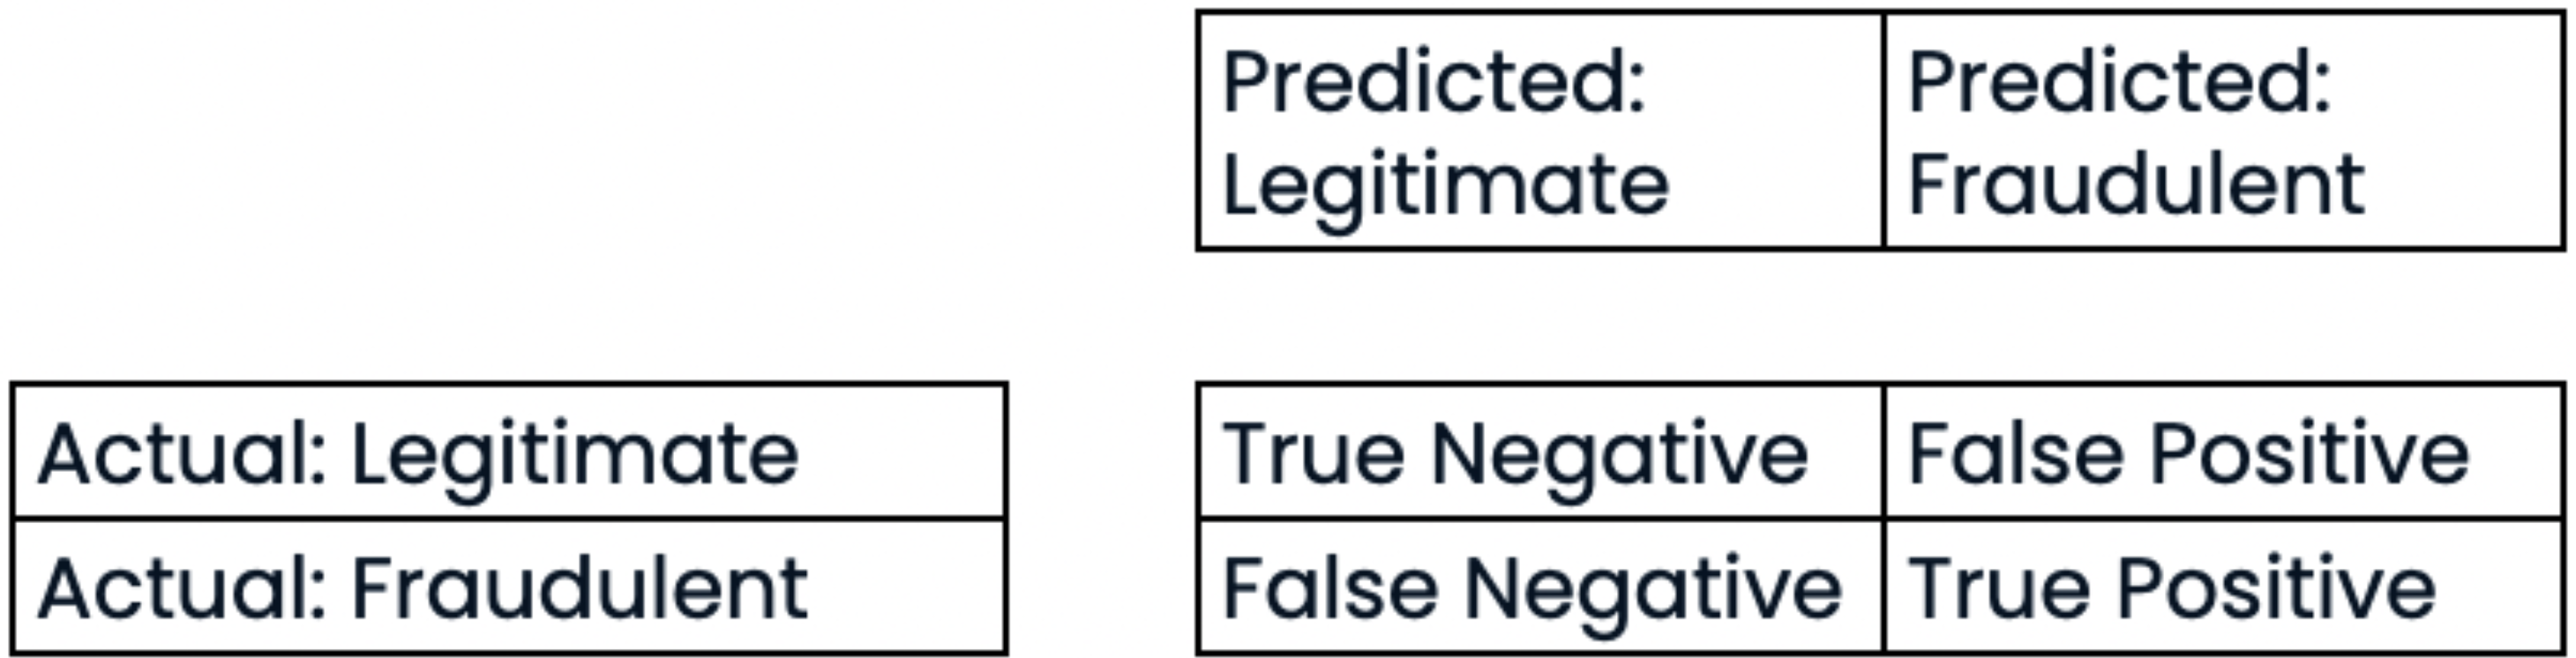

In [2]:
from IPython.display import Image
Image(filename='images/cf.png', width=500)

Accuracy = $\frac{tp+tn}{tp+tn+fp+fn}$

Precision ('positive predictive value') = $\frac{tp}{tp+fp}$
- High precision = lower false positive rate (e.g. not many legitimate transactions are predicted to be fraudulent)
- Concerns all predicted fraudulent +ve class (e.g. all predicted to be fraudulent)
- Right column of confusion matrix

Recall ('sensitivity') = $\frac{tp}{tp+fn}$
- High recall = lower false negative rate (e.g. predicted most fraudulent transactions correctly)
- Concerns all actual +ve class (e.g. all actual fraudulent)

F1 score = $2 * \frac{precision * recall}{precision + recall}$
- Harmonic mean of precision and recall
- Gives equal weights to precision and recall
- Favours models with similar precision and recall

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
diabetes_df = pd.read_csv('./datasets/diabetes_clean.csv')

In [3]:
diabetes_df_sub = diabetes_df[['bmi', 'age', 'diabetes']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_df_sub.drop("diabetes", axis=1).values,
    diabetes_df_sub["diabetes"].values,
    test_size=0.3,
    random_state=42
)

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [6]:
y_pred = knn.predict(X_test)

In [7]:
# Generate confusion matrix and classification report
print(confusion_matrix(y_test, y_pred)) # can add labels=[1,0] - careful of ordering!
print(classification_report(y_test, y_pred))

[[117  34]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



We see 117 TN, 34 FP, 47 FN and 33 TP. We see a better F1-score for the zero class (i.e. people without diabetes).

Precision (1): TP/(TP+FP) = 33/(33+34) = 0.49

Precision (0): TN/(TN+FN) = 117/(117+47) = 0.71

Recall (1): TP/(TP+FN) = 33/(33+47) = 0.41

Recall (0): TN/(TN+FP) = 117/(117+34) = 0.77

F1 (1): (2*(pr+re))/(pre+rec) = 0.45

F1 (0): (2*(pr+re))/(pre+rec) = 0.74

Accuracy: (TP+TN)/(TP+TN+FP+FN) = (33+117)/(33+117+34+47) = 0.65

## Logistic regression and the ROC curve

Logistic regression:
- Used for classification problems
- Outputs probabilities:
    - If $p > 0.5$: data labeled 1
    - If $p < 0.5$: data labeled 0
- Produces a linear decision boundary

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [9]:
X = diabetes_df.drop('diabetes', axis=1).values
y = diabetes_df['diabetes'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred_probs[:10]

array([0.26551021, 0.18336638, 0.1211966 , 0.15613521, 0.4961118 ,
       0.4458219 , 0.01359249, 0.61646093, 0.55640529, 0.79311776])

Probability of a diabetes diagnosis for the first 10 individuals ranges from 0.01 to 0.79.

In [13]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

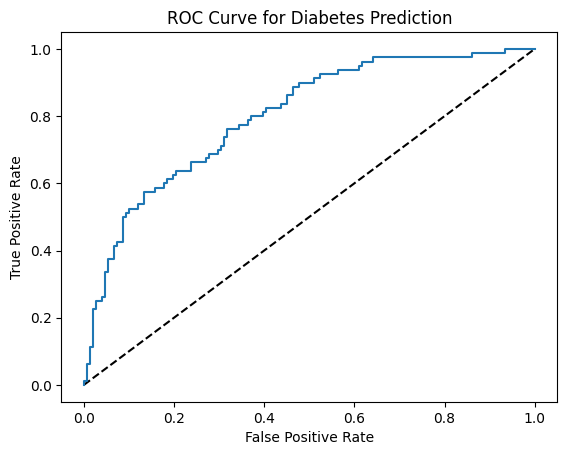

In [14]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The model is much better than randomly guessing the class of each observation (ROC curve is above the dotted line, where the dotted line is a chance model - randomly guesses labels).

By default, logistic regression has a 0.5 threshold (can vary the threshold).

TPR = Recall = Sensitivity

FPR = 1 - Specificity = $1 - \frac{FP}{FP+TN}$

- If threshold=0: model predicts 1 for all observations, so predicts all +ve values correctly, and incorrectly predicts all -ve values (top right of ROC curve)
- If threshold=1: model predicts 0 for all data, so TPR and FPR = 0 (bottom left of ROC curve)
- If threshold=0.5: model above chance model line

Line is smoothed over different thresholds, which give different TPR and FPR values

ROC AUC: area under the curve (from 0-1, where 1 is ideal)

Perfect model: TPR=1, FPR=0

In [15]:
print(roc_auc_score(y_test, y_pred_probs))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8002483443708608
[[117  34]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



ROC AUC score of 0.8002 means this model is 0.8002/0.5=60% better than a chance model at correctly predicting labels.

## Hyperparameter tuning

Hyperparameters: parameters we specify before fitting the model (e.g. alpha and n_neighbors)

We try different hyperparameter values, fit all of them separately, see how well they perform, and choose the best performing values.

It's essential to use cross-validation to avoid overfitting to the test set (here we split the data and perform CV on the training set, and leave the test set for final evaluation).

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import numpy as np

In [17]:
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

In [18]:
lasso = Lasso()

In [19]:
kf = KFold()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 5.26410526e-02, 1.05272105e-01, 1.57903158e-01,
       2.10534211e-01, 2.63165263e-01, 3.15796316e-01, 3.68427368e-01,
       4.21058421e-01, 4.73689474e-01, 5.26320526e-01, 5.78951579e-01,
       6.31582632e-01, 6.84213684e-01, 7.36844737e-01, 7.89475789e-01,
       8.42106842e-01, 8.94737895e-01, 9.47368947e-01, 1.00000000e+00])})

In [22]:
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.27122338337314245


We see the best model only has an R-squared score of 0.27 (using the optimal hyperparameters does not guarantee a high performing model).

Limitations of grid search: 10-fold CV, 3 hyperparameters, 30 total values = 900 fits! (can be computationally expensive)

In [23]:
params = {"penalty": ['l1', "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0: 0.8, 1: 0.2}]}

In [24]:
logreg = LogisticRegression()

In [25]:
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)
logreg_cv.fit(X_train, y_train)

/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/harrybaines/Documents/Coding/DataCamp-ML-Scientist-Track/datacampenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [26]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.9387816326530612, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.9081632653061225}
Tuned Logistic Regression Best Accuracy Score: 0.7524323603891777


In [27]:
test_score = logreg_cv.score(X_test, y_test)
test_score

0.6948051948051948

After trying a few hyperparameters, we get a model with 70% accuracy!